# Market Study : The catalog of Fiverr's Offers

Fiverr is an Israeli online marketplace for freelance services. The company provides a platform for freelancers to offer services to customers worldwide.
Fiverr was founded by Micha Kaufman and Shai Wininger, and was launched in February 2010. The founders came up with the concept of a marketplace that would provide a two sided platform for people to buy and sell a variety of digital services typically offered by freelance contractors. Services offered on the site include writing, translation, graphic design, video editing and programming.Fiverr's services start at US$5, and can go up to thousands of dollars with gig extras. Each service offered is called a "gig".

In december 16th 2020, Fiveer announced the results of a survey, conducted in partnership with Censuswide, analyzing U.S. workers who are working remotely or who did so this year* and their current sentiment towards remote work and their jobs in 2021. The data set, which looks at 1,035 of these workers, revealed that the current work from home environment is leading to an increase in people’s desire to freelance.

View the full release here: https://www.businesswire.com/news/home/20201216005256/en/




In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
print('Libraries imported.')
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
# check for latest version of Matplotlib 
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Libraries imported.
Matplotlib version:  3.3.2


In [2]:
#Let's import a data set coming from Fiverr extracted on March 2021
#As the document is a CSV file, if you cannot open it and receive this kind of error "utf-8' codec can't decode byte 0xe5 in position 0: invalid continuation byte", search for the good encoding.
df=pd.read_csv(r'/Users/Laura/Desktop/fiverr_clean.csv',encoding = "latin-1")
df

,Unnamed: 0,ï..Category,Subcat,name,price,stars,votes
0,1,Programming & Tech,Data Analysis & Reports,build automated and insightful power bi report,137.76,5.0,10
1,2,Lifestyle,Greeting Cards & Videos,get kermit to personalize a video birthday gre...,4.44,5.0,1k+
2,3,Programming & Tech,Website Builders & CMS,build or redesign your existing squarespace we...,66.66,5.0,68
3,4,Lifestyle,Cooking Lessons,create original eastern food cooking video recipe,17.78,4.9,5
4,5,Writing & Translation,Legal Writing,write gdpr privacy policy and terms and condit...,8.89,5.0,2
...,...,...,...,...,...,...,...
6178,6179,Video & Animation,Animated GIFs,do unique motion graphics video and animated gif,39.99,4.8,41
6179,6180,Business,Market Research,compare your business with its competitors,355.51,4.9,4
6180,6181,Writing & Translation,Transcripts,accurately transcribe audio and video files,8.89,5.0,15
6181,6182,Lifestyle,Cooking Lessons,film high quality cooking video,62.21,5.0,8


In [3]:
df.rename(columns={"ï..Category": "FirstCategory"}, inplace=True)
df.rename(columns={"Unnamed: 0": "Count"}, inplace=True)
df_category_count = df.pivot_table(index=['FirstCategory'], aggfunc='size')
df_Subcat_count = df.pivot_table(index=['Subcat'], aggfunc='size')
df['price'].dtypes
df['price'].transform(pd.to_numeric, errors='coerce')
print (df_category_count) 
print (df_Subcat_count)

FirstCategory
Business                  720
Digital Marketing         336
Lifestyle                 864
Music & Audio             768
Programming & Tech        807
Video & Animation        1248
Writing & Translation    1440
dtype: int64
Subcat
3D Product Animation                48
Animated GIFs                       48
Animation for Kids                  48
Animation for Streamers             48
App & Website Previews              48
                                    ..
White Papers                        48
Whiteboard & Animated Explainers    48
WordPress                           48
Your Message On...                  48
eLearning Video ProductionNew       48
Length: 129, dtype: int64


In [4]:
print ("There is 7 Categories and 129 Sub-Categories in Fiverr.")

There is 7 Categories and 129 Sub-Categories in Fiverr.


In [5]:
df.dtypes

Count             int64
FirstCategory    object
Subcat           object
name             object
price            object
stars            object
votes            object
dtype: object

In [6]:
#Change price type to be able to make some calculation on it
df.price = df['price'].str.replace(',', '.', regex=True).astype(float)

In [7]:
df['price2']=df.price

In [8]:
df.head()

,Count,FirstCategory,Subcat,name,price,stars,votes,price2
0,1,Programming & Tech,Data Analysis & Reports,build automated and insightful power bi report,137.76,5.0,10,137.76
1,2,Lifestyle,Greeting Cards & Videos,get kermit to personalize a video birthday gre...,4.44,5.0,1k+,4.44
2,3,Programming & Tech,Website Builders & CMS,build or redesign your existing squarespace we...,66.66,5.0,68,66.66
3,4,Lifestyle,Cooking Lessons,create original eastern food cooking video recipe,17.78,4.9,5,17.78
4,5,Writing & Translation,Legal Writing,write gdpr privacy policy and terms and condit...,8.89,5.0,2,8.89


In [9]:
df['price2'].describe()

count    6183.000000
mean       53.688866
std        91.518546
min         1.103000
25%         8.890000
50%        22.220000
75%        57.770000
max       999.870000
Name: price2, dtype: float64

In [10]:
df.drop(columns="price",  axis=1, inplace=True)
df.rename(columns={"price2": "price"}, inplace=True)
df.head()

,Count,FirstCategory,Subcat,name,stars,votes,price
0,1,Programming & Tech,Data Analysis & Reports,build automated and insightful power bi report,5.0,10,137.76
1,2,Lifestyle,Greeting Cards & Videos,get kermit to personalize a video birthday gre...,5.0,1k+,4.44
2,3,Programming & Tech,Website Builders & CMS,build or redesign your existing squarespace we...,5.0,68,66.66
3,4,Lifestyle,Cooking Lessons,create original eastern food cooking video recipe,4.9,5,17.78
4,5,Writing & Translation,Legal Writing,write gdpr privacy policy and terms and condit...,5.0,2,8.89


In [11]:
df.drop(columns="stars",  axis=1, inplace=True)
df.drop(columns="name",  axis=1, inplace=True)
df.drop(columns="votes",  axis=1, inplace=True)
df

,Count,FirstCategory,Subcat,price
0,1,Programming & Tech,Data Analysis & Reports,137.76
1,2,Lifestyle,Greeting Cards & Videos,4.44
2,3,Programming & Tech,Website Builders & CMS,66.66
3,4,Lifestyle,Cooking Lessons,17.78
4,5,Writing & Translation,Legal Writing,8.89
...,...,...,...,...
6178,6179,Video & Animation,Animated GIFs,39.99
6179,6180,Business,Market Research,355.51
6180,6181,Writing & Translation,Transcripts,8.89
6181,6182,Lifestyle,Cooking Lessons,62.21


In [12]:
df1=(df.groupby('Subcat').FirstCategory.nunique().to_frame())
df_subcat = pd.merge(df, df1, on='Subcat')
df_subcat

,Count,FirstCategory_x,Subcat,price,FirstCategory_y
0,1,Programming & Tech,Data Analysis & Reports,137.76,1
1,65,Programming & Tech,Data Analysis & Reports,44.44,1
2,361,Programming & Tech,Data Analysis & Reports,4.44,1
3,387,Programming & Tech,Data Analysis & Reports,79.99,1
4,548,Programming & Tech,Data Analysis & Reports,8.89,1
...,...,...,...,...,...
6178,5140,Writing & Translation,Social Media Copy,26.66,1
6179,5327,Writing & Translation,Social Media Copy,13.33,1
6180,5756,Writing & Translation,Social Media Copy,53.33,1
6181,5945,Writing & Translation,Social Media Copy,13.33,1


In [13]:
# group countries by continents and apply sum() function
df_subcat1 = df_subcat.groupby('FirstCategory_x', axis=0).sum()
# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum()) print(type(df_can.groupby('Continent', axis=0)))
df_subcat1.head()

,Count,price,FirstCategory_y
FirstCategory_x,,,
Business,2302084,42894.652,720
Digital Marketing,1020853,15602.440,336
Lifestyle,2643198,14366.610,864
Music & Audio,2362997,30486.364,768
Programming & Tech,2518705,63559.387,807


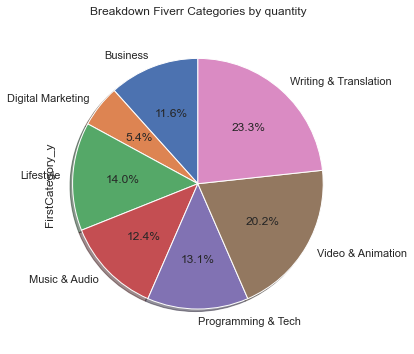

In [29]:

df_subcat1['FirstCategory_y'].plot(kind='pie',
                        figsize=(5, 6),
                        autopct='%1.1f%%', # add in percentages 
                        startangle=90, # start angle 90° (Africa) 
                        shadow=True, # add shadow
)
plt.title('Breakdown Fiverr Categories by quantity') 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()



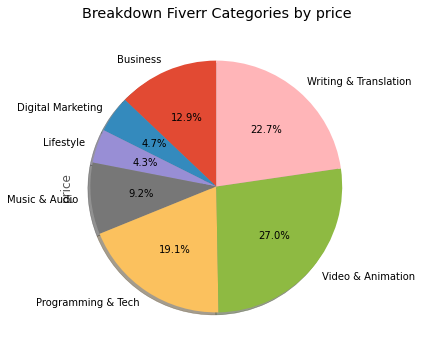

In [15]:
df_subcat1['price'].plot(kind='pie',
                        figsize=(5, 6),
                        autopct='%1.1f%%', # add in percentages 
                        startangle=90, # start angle 90° (Africa) 
                        shadow=True, # add shadow
)
plt.title('Breakdown Fiverr Categories by price') 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

In [16]:
print ("Fiverr's largest categories are Writing and Translation, Video & Animation and Lifestyle.")

Fiverr's largest categories are Writing and Translation, Video & Animation and Lifestyle.


In [17]:
df_subcat.rename(columns={"FirstCategory_y": "Qtity"}, inplace=True)
df_subcat.head()

,Count,FirstCategory_x,Subcat,price,Qtity
0,1,Programming & Tech,Data Analysis & Reports,137.76,1
1,65,Programming & Tech,Data Analysis & Reports,44.44,1
2,361,Programming & Tech,Data Analysis & Reports,4.44,1
3,387,Programming & Tech,Data Analysis & Reports,79.99,1
4,548,Programming & Tech,Data Analysis & Reports,8.89,1


In [18]:
# group countries by continents and apply sum() function
#df.groupby(['Fruit','Name']).sum()
d2=df_subcat
df_subcat_updated = d2.groupby('Subcat', axis=0).sum()
# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum()) print(type(df_can.groupby('Continent', axis=0)))
df_subcat_updated

,Count,price,Qtity
Subcat,,,
3D Product Animation,164284,5763.710,48
Animated GIFs,152718,2586.350,48
Animation for Kids,159288,2541.920,48
Animation for Streamers,123721,2124.140,48
App & Website Previews,141154,2781.870,48
...,...,...,...
White Papers,158386,4457.220,48
Whiteboard & Animated Explainers,166032,7342.283,48
WordPress,171174,5978.848,48


In [19]:
#Get the mean of the average of price by subcategory
df_subcat_updated['mean']= df_subcat_updated['price']/df_subcat_updated['Qtity']
df_subcat_updated= df_subcat_updated.sort_values('mean',ascending=False)
df_subcat_updated.reset_index(level=0, inplace=True)
df_subcat_updated

,Subcat,Count,price,Qtity,mean
0,Cybersecurity & Data ProtectionNew,126923,9680.174,39,248.209590
1,Local PhotographyBeta,141529,9109.332,48,189.777750
2,E-Commerce Development,173859,8924.433,48,185.925687
3,Website Builders & CMS,127245,8087.870,48,168.497292
4,Whiteboard & Animated Explainers,166032,7342.283,48,152.964229
...,...,...,...,...,...
124,Subtitles & Captions,139687,448.730,48,9.348542
125,Transcripts,151657,422.100,48,8.793750
126,Traveling,137447,368.750,48,7.682292
127,Collectibles,154742,324.330,48,6.756875


In [20]:
df_updateSub50=df_subcat_updated.head(50)

(0.0, 12373.93462307693)

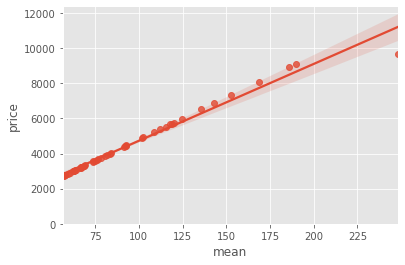

In [21]:
sns.regplot(x="mean", y="price", data=df_updateSub50)
plt.ylim(0,)

<AxesSubplot:xlabel='Subcat', ylabel='count'>

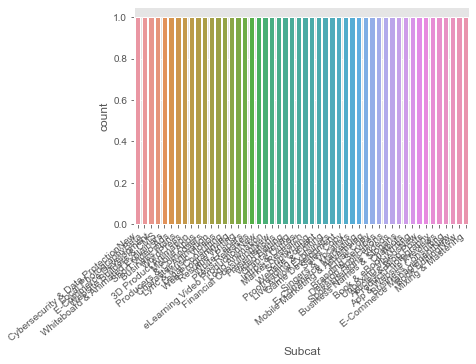

In [22]:
ax = sns.countplot(x='Subcat', data=df_updateSub50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Subcat',data=df_updateSub50)

In [23]:
#R2 is a statistic that will give some information about the goodness of fit of a model. 
#In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. 
#An R2 of 1 indicates that the regression predictions perfectly fit the data
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 
#Take a screenshot of your code and the value of the R^2
X = df_updateSub50[['mean']]
Y = df_updateSub50['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.978356171709423

In [24]:
#Import the necessary modules:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [25]:
#We will split the data into training and testing sets
features = ['mean','Qtity']
X = df_updateSub50[features]
Y = df_updateSub50['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 8
number of training samples: 42


In [26]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
from sklearn.linear_model import Ridge

In [27]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.9999999350888501

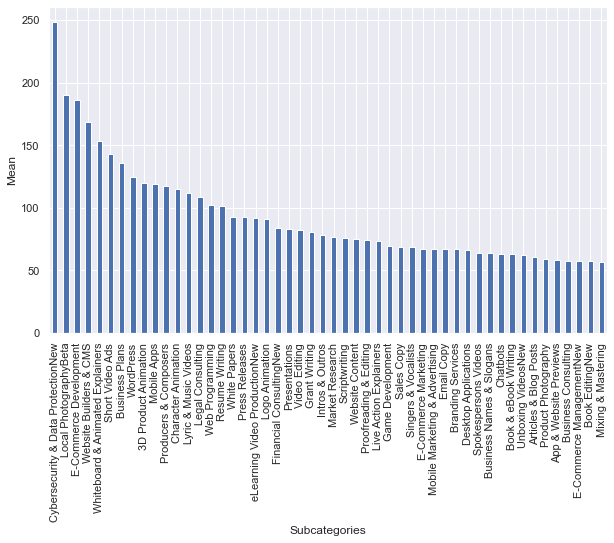

In [28]:
# step 2: plot data by sorting it decreasingly
df_updateSub50 = df_updateSub50.groupby('Subcat', axis=0).sum()
df_updateSub50= df_updateSub50.sort_values('mean',ascending=False)
df_updateSub50['mean'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Subcategories') # add to x-label to the plot
plt.ylabel('Mean') # add y-label to the plot plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add titl e to the plot
plt.show()

In [36]:
print(" First 50 sub-categories can pay you between §50 and §250 if you are skilled in it!")

 First 50 sub-categories can pay you between §50 and §250 if you are skilled in it!
